In [2]:
#!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/car1.jpg         
  inflating: images/car10.jpg        
  inflating: images/car11.jpg        
  inflating: images/car12.jpg        
  inflating: images/car13.jpg        
  inflating: images/car14.jpg        
  inflating: images/car15.jpg        
  inflating: images/car16.jpg        
  inflating: images/car17.jpg        
  inflating: images/car18.jpg        
  inflating: images/car19.jpg        
  inflating: images/car2.jpg         
  inflating: images/car20.jpg        
  inflating: images/car3.jpg         
  inflating: images/car4.jpg         
  inflating: images/car5.jpg         
  inflating: images/car6.jpg         
  inflating: images/car7.jpg         
  inflating: images/car8.jpg         
  inflating: images/car9.jpg         
  inflating: images/dog1.jpg         
  inflating: images/dog10.jpg        
  inflating: images/dog11.jpg        
  inflating: images/dog12.jpg        
  inflating: images/dog13.jpg        
  inflat

In [12]:
#!mv images/*.* images/color/

In [12]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave,imshow
import numpy as np
import tensorflow as tf

In [2]:
path = 'images'

In [3]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(256, 256), batch_size=20, class_mode=None)

Found 60 images belonging to 2 classes.


In [4]:
print(len(train))

3


In [5]:
print(len(train[2]))

20


In [6]:
X =[]
Y =[]

for item in train[0]:
  try:
      lab = rgb2lab(item)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
      print('error')

for item in train[1]:
  try:
      lab = rgb2lab(item)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
      print('error')

for item in train[2]:
  try:
      lab = rgb2lab(item)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
      print('error')

In [7]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(60, 256, 256, 1)
(60, 256, 256, 2)


### Model Architecture

In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 2)    │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 2)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,219,410 (23.73 MB)

 Trainable params: 6,219,410 (23.73 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model = load_model('colorisation.keras')
model.fit(X,Y,validation_split=0.2, epochs=300)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.9009 - loss: 0.0013 - val_accuracy: 0.6198 - val_loss: 0.0297
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 0.9002 - loss: 0.0013 - val_accuracy: 0.6275 - val_loss: 0.0294
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.8997 - loss: 0.0013 - val_accuracy: 0.6332 - val_loss: 0.0293
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9007 - loss: 0.0012 - val_accuracy: 0.6208 - val_loss: 0.0296
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9016 - loss: 0.0012 - val_accuracy: 0.6135 - val_loss: 0.0292
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.9045 - loss: 0.0012 - val_accuracy: 0.6317 - val_loss: 0.0297
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.9062 - loss: 0.0012 - val_accuracy: 0.6251 - val_loss: 0.0290
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - accuracy: 0.9099 - loss: 0.0012 - val_accuracy: 0.6221 - val

In [14]:
model.save("colorisation.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<ipython-input-15-f6a5c8d7d088>:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 6 negative Z values that have been clipped to zero
  imshow(lab2rgb(result))
<ipython-input-15-f6a5c8d7d088>:17: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(lab2rgb(result))


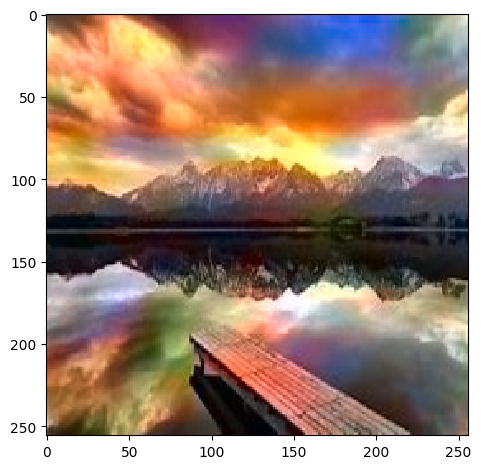

In [15]:
img1_color=[]

img1=img_to_array(load_img('test_img.jpg'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
